#Match OCR

This script is an initial approach to extract time from a match image since videos are compused of frames. The input is an image and the OCR model identifies the english text in the image. 



###Sample Output 
A sample output of the identified parts of the image is available on Github [Link](https://github.com/reemalyami/AutoMeet/blob/main/Sample_Data/output_sample.png). 

###Team Members
1. Norah AlSerhani. (norahalserhani@gmail.com)
2. Reem AlYami. (reem.m.yami@gmail.com)
3. Jawharah Almulhim. (jawharah.almulhim@gmail.com)
4. Sarah AlMuhaish. (Sarah.a.almuhaysh@gmail.com)
5. Lama AlBakhat. (lama.albakhat@gmail.com)

In [1]:
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 604 kB 83.5 MB/s 
     |████████████████████████████████| 108 kB 70.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60
Looking in indexes: https://pypi.org/simple, https://us-python

In [2]:
import easyocr
import numpy as np
from PIL import Image, ImageDraw

reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
def detect_text_blocks(img_path):
    detection_result = reader.detect(img_path,
                                 width_ths=0.7, 
                                 mag_ratio=1.5)
    text_coordinates = detection_result[0][0]
    return text_coordinates

In [30]:
import requests
from io import BytesIO
from PIL import Image
url = 'https://raw.github.com/reemalyami/AutoMeet/main/Sample_Data/sample_match_image.jpeg'
page = requests.get(url)
image = Image.open(BytesIO(page.content))

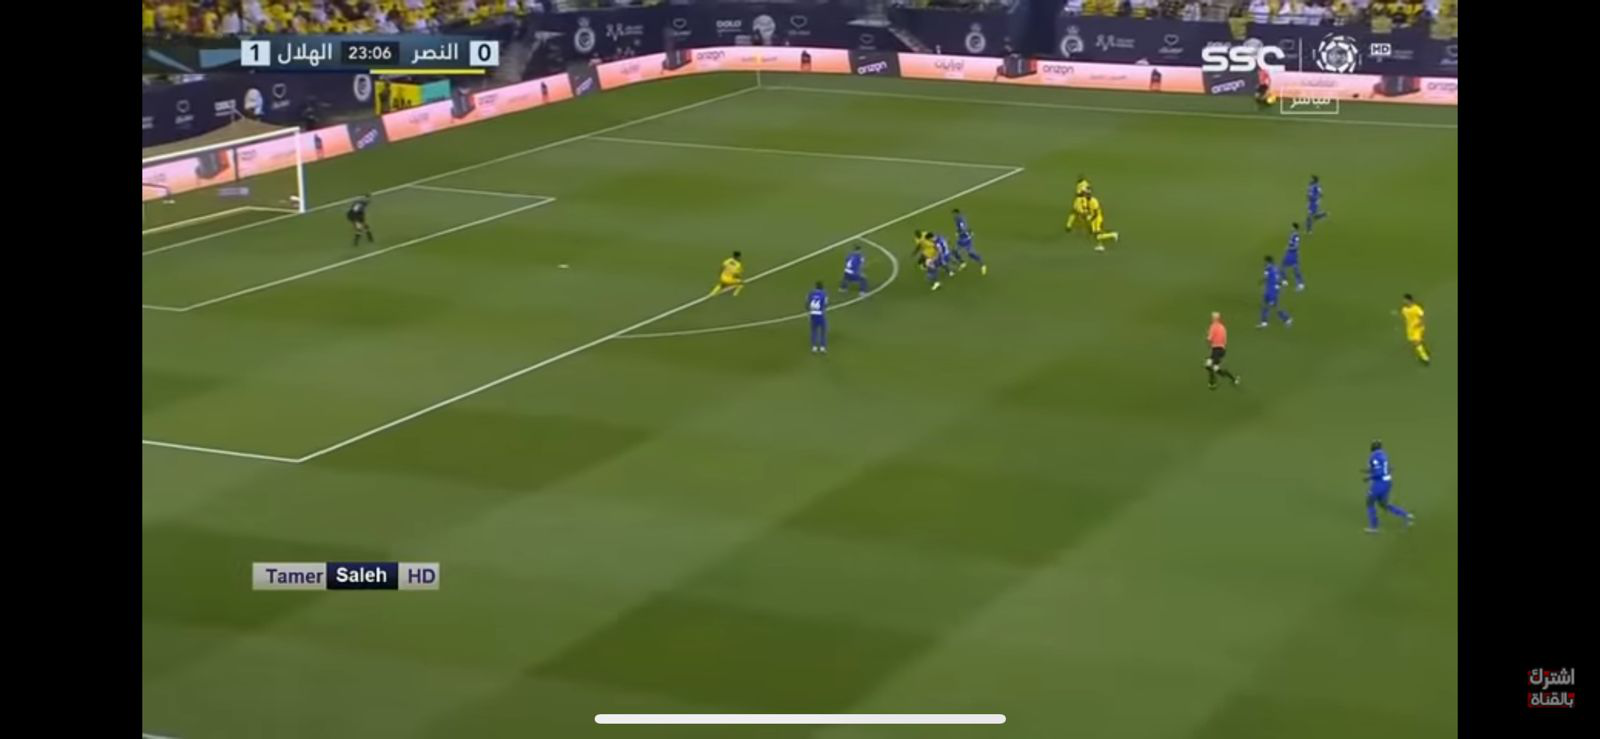

In [31]:
image

In [19]:
image.save('sample_image.jpeg')

In [20]:
img_path = '/content/sample_image.jpeg'
text_coordinates = detect_text_blocks(img_path)
print(text_coordinates)

[[603, 643, 21, 42], [715, 738, 17, 33], [272, 396, 38, 70], [475, 494, 40, 65], [857, 877, 32, 53], [1059, 1138, 27, 56], [1158, 1184, 31, 55], [1197, 1288, 38, 77], [262, 391, 563, 587], [405, 438, 565, 586], [1526, 1580, 664, 691], [1527, 1576, 688, 708]]


In [21]:
def draw_bounds(img_path, bbox):
    image = Image.open(img_path)  
    draw = ImageDraw.Draw(image)
    for b in bbox:
        p0, p1, p2, p3 = [b[0], b[2]], [b[1], b[2]], \
                         [b[1], b[3]], [b[0], b[3]]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill='red', width=2)
    return np.asarray(image)

In [22]:
text_blocks_in_image = draw_bounds(img_path, text_coordinates)

In [23]:
type(text_blocks_in_image)

numpy.ndarray

In [27]:
import numpy as np
from PIL import Image


pil_image=Image.fromarray(text_blocks_in_image)
pil_image.save("output_sample.png")

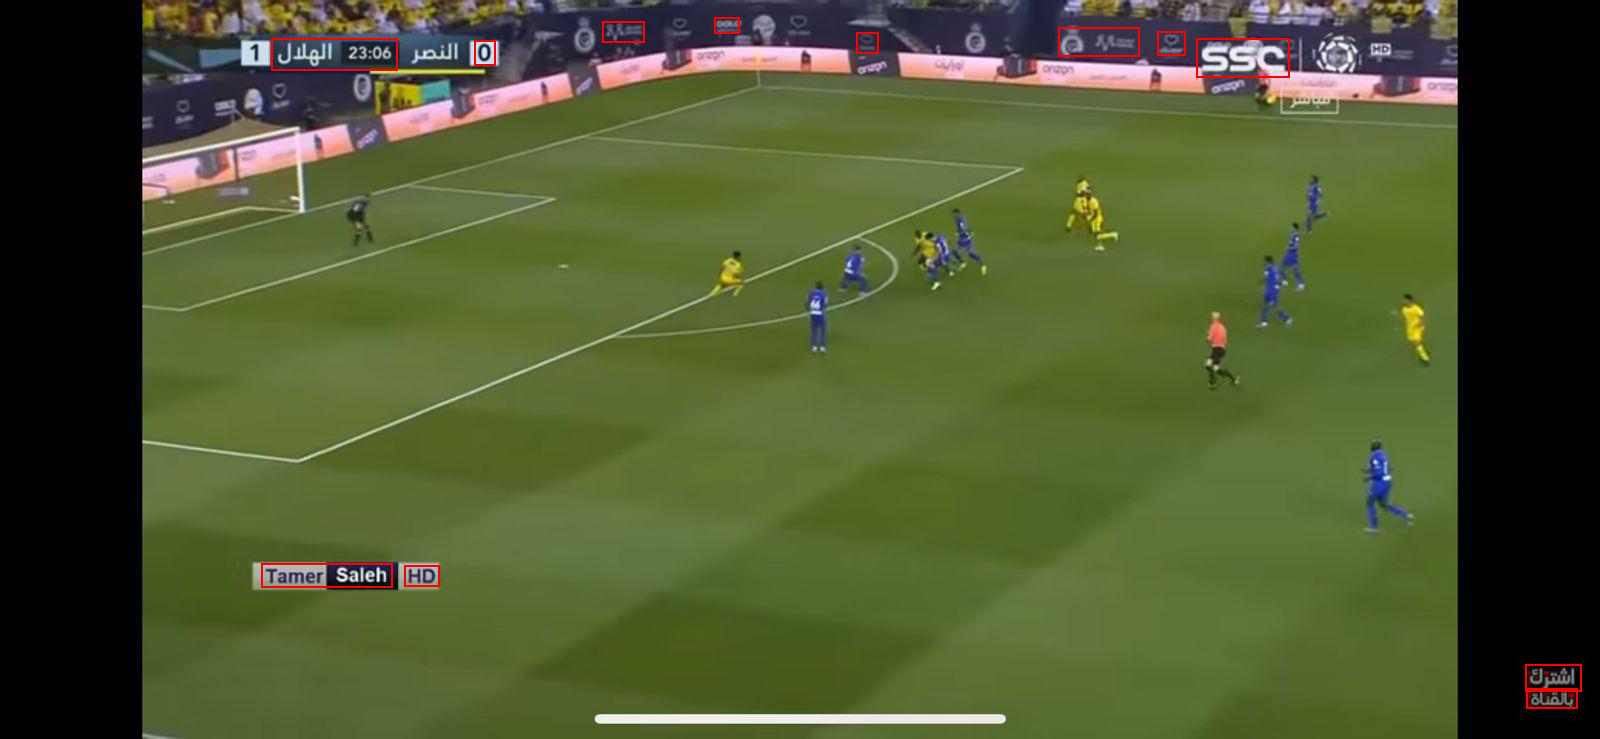

In [28]:
pil_image

In [25]:
text_blocks_in_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [26]:
recognition_results = reader.recognize(img_path,
                                 horizontal_list=text_coordinates,
                                 free_list=[]
                                 )
for txt in recognition_results:
    print("{}: {}".format(txt[0],txt[1]))

[[603, 21], [643, 21], [643, 42], [603, 42]]: Me
[[715, 17], [738, 17], [738, 33], [715, 33]]: D
[[272, 38], [396, 38], [396, 70], [272, 70]]: Juell | 23.06
[[475, 40], [494, 40], [494, 65], [475, 65]]: 0
[[857, 32], [877, 32], [877, 53], [857, 53]]: 8
[[1059, 27], [1138, 27], [1138, 56], [1059, 56]]: 0 #
[[1158, 31], [1184, 31], [1184, 55], [1158, 55]]: 9
[[1197, 38], [1288, 38], [1288, 77], [1197, 77]]: Ssc
[[262, 563], [391, 563], [391, 587], [262, 587]]: Tamer   Saleh
[[405, 565], [438, 565], [438, 586], [405, 586]]: HD
[[1526, 664], [1580, 664], [1580, 691], [1526, 691]]: Jjiwl
[[1527, 688], [1576, 688], [1576, 708], [1527, 708]]: oluall
